In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import os

In [2]:
# Read the data from the local system
data = pd.read_csv("C:\DataAnalysis\Data\Mlern\diabetes.csv")
data.head()

,NoOfPregnancies,GlucoseLevel,BloodPressureLevel,SkinThickness,HoursInsulinIn,BMI,DiabetesPedigreeFunction,Age,RiskDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# I want to use train_test_split evaluation method
# So I conventionally import the scikit-learn train/test split package
from sklearn.model_selection import train_test_split

In [4]:
# Check the Dataset columns
data.columns

Index(['NoOfPregnancies', 'GlucoseLevel', 'BloodPressureLevel',
       'SkinThickness', 'HoursInsulinIn', 'BMI', 'DiabetesPedigreeFunction',
       'Age', 'RiskDiabetes'],
      dtype='object')

In [5]:
# separate the Features and Response from the dataset and lebel them

X = data[['NoOfPregnancies', 'GlucoseLevel', 'BloodPressureLevel',
       'SkinThickness', 'HoursInsulinIn', 'BMI', 'DiabetesPedigreeFunction',
       'Age']]
y = data['RiskDiabetes']


In [6]:
# Just check the few records on top side
X.head()

,NoOfPregnancies,GlucoseLevel,BloodPressureLevel,SkinThickness,HoursInsulinIn,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
#Response variable
y.head()

0    1
1    0
2    1
3    0
4    1
Name: RiskDiabetes, dtype: int64

In [8]:
# Now I will check shape and type of features and response 
# check shape
X.shape
y.shape

(768,)

In [9]:
# Check type
type(X)
type(y)

pandas.core.series.Series

### train/test split, train:test = 75:25

In [33]:
# Now split the Dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=4, test_size=0.25)

In [34]:
#Check the train/test splited data
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(192,)

In [35]:
# Conventionally import the Decission tress class
from sklearn.tree import DecisionTreeClassifier

In [36]:
#Create an instance of Model class
dtree = DecisionTreeClassifier()

In [37]:
# Fit the training data into model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
y_est = dtree.predict(X_test)

In [55]:
y_est

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

#### Check the Model Accuracy and Evaluation

In [39]:
# To measure accuracy we import metrics from scikit-learn package

from sklearn import metrics

In [40]:
metrics.accuracy_score(y_test,y_est)

0.70833333333333337

In [41]:
# Compare the Observed values and Predicted value , we use confusionMatix
from pandas_ml import ConfusionMatrix

In [42]:
cm = ConfusionMatrix(y_test, y_est)

In [43]:
cm

Predicted  0.0  1.0  __all__
Actual                      
0.0         22   10       32
1.0         12    5       17
__all__     34   15       49

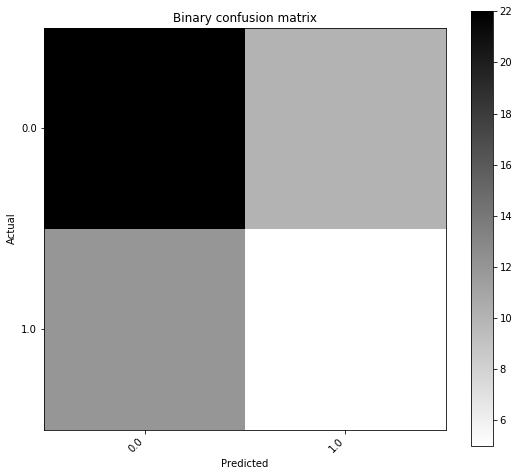

In [44]:
# Plotting the Observed and predicted result on the Test set data
cm.plot()

### Check the Overall statistics

In [45]:
# Print Overall statistics
cm.print_stats()

population: 49
P: 17
N: 32
PositiveTest: 15
NegativeTest: 34
TP: 5
TN: 22
FP: 10
FN: 12
TPR: 0.294117647059
TNR: 0.6875
PPV: 0.333333333333
NPV: 0.647058823529
FPR: 0.3125
FDR: 0.666666666667
FNR: 0.705882352941
ACC: 0.551020408163
F1_score: 0.3125
MCC: -0.0189852124814
informedness: -0.0183823529412
markedness: -0.0196078431373
prevalence: 0.34693877551
LRP: 0.941176470588
LRN: 1.02673796791
DOR: 0.916666666667
FOR: 0.352941176471


### train/test split , train:test = 65:35, random_state=4

In [107]:
X65_train, X35_test,y65_train,y35_test = train_test_split(X,y, test_size=0.35, random_state=4)

In [108]:
X65_train.shape

(499, 8)

In [109]:
X35_test.shape

(269, 8)

In [110]:
y65_train.shape

(499,)

In [111]:
y35_test.shape

(269,)

In [112]:
# make an instance of decision tree class
Decison = DecisionTreeClassifier()

In [113]:
# Fit the model with training data
Decison.fit(X65_train,y65_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [114]:
y_pred = Decison.predict(X35_test)

### Check Model accuracy 

In [116]:
metrics.accuracy_score(y35_test,y_pred)                        # accuracy level is 72% so we may say good fit

0.72118959107806691

In [117]:
cm2 = ConfusionMatrix(y35_test,y_pred)

In [118]:
cm2

Predicted  0.0  1.0  __all__
Actual                      
0.0         43   22       65
1.0         23   13       36
__all__     66   35      101

In [119]:
cm2.print_stats()

population: 101
P: 36
N: 65
PositiveTest: 35
NegativeTest: 66
TP: 13
TN: 43
FP: 22
FN: 23
TPR: 0.361111111111
TNR: 0.661538461538
PPV: 0.371428571429
NPV: 0.651515151515
FPR: 0.338461538462
FDR: 0.628571428571
FNR: 0.638888888889
ACC: 0.554455445545
F1_score: 0.366197183099
MCC: 0.0227961733558
informedness: 0.0226495726496
markedness: 0.0229437229437
prevalence: 0.356435643564
LRP: 1.06691919192
LRN: 0.965762273902
DOR: 1.104743083
FOR: 0.348484848485


#### 10 fold cross-validation evaluation

In [120]:
# import cross_val_score from sklearn package
from sklearn.model_selection import cross_val_score

In [121]:
y_score = cross_val_score(dtree, X,y, cv=10, scoring='accuracy').mean()

In [122]:
y_score

0.71483253588516749

#### Logistics Regression

In [123]:
# import Logistics class
from sklearn.linear_model import LogisticRegression

### train:test split, train:test=75:25, random_state=4

In [127]:
lgR = LogisticRegression()

lgR.fit(X_train,y_train)
lgr_pred = lgR.predict(X_test)

In [128]:
metrics.accuracy_score(y_test, lgr_pred)

0.8125

In [129]:
cm_lgR = ConfusionMatrix(y_test, lgr_pred)
cm_lgR

Predicted  0.0  1.0  __all__
Actual                      
0.0         21   11       32
1.0         12    5       17
__all__     33   16       49

In [130]:
cm_lgR.print_stats()

population: 49
P: 17
N: 32
PositiveTest: 16
NegativeTest: 33
TP: 5
TN: 21
FP: 11
FN: 12
TPR: 0.294117647059
TNR: 0.65625
PPV: 0.3125
NPV: 0.636363636364
FPR: 0.34375
FDR: 0.6875
FNR: 0.705882352941
ACC: 0.530612244898
F1_score: 0.30303030303
MCC: -0.050378745996
informedness: -0.0496323529412
markedness: -0.0511363636364
prevalence: 0.34693877551
LRP: 0.855614973262
LRN: 1.0756302521
DOR: 0.795454545455
FOR: 0.363636363636


### train:test split, train:test=65:35 random_state=4

In [131]:
logisR65 = LogisticRegression()

In [132]:
logisR65.fit(X65_train, y65_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [134]:
y_logis35 =logisR65.predict(X35_test)

In [135]:
metrics.accuracy_score(y35_test,y_logis35)

0.82156133828996281

In [136]:
cm2lg = ConfusionMatrix(y35_test,y_logis35)

In [ ]:
cm2lg.pr